In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
start_date = "2023-11-01"
end_date = "2024-11-01"


In [ ]:
def download_data(ticker_symbol, start_date, end_date, interval):
  ticker_data = yf.Ticker(ticker_symbol)
  ticker_df = ticker_data.history(start = start_date, end = end_date, interval = interval)
  return ticker_df

# **Download the data**

In [ ]:
def get_history(symbol):
  chart_1d = download_data(symbol, start_date, end_date, "1d")
  chart_1h = download_data(symbol, start_date, end_date, "1h")
  chart_4h = chart_1h[chart_1h.index.hour % 4 == 0]
  return {
      "1d": chart_1d,
      "1h": chart_1h,
      "4h": chart_4h,
  }

In [ ]:
def is_stationary(close_prices, alpha=0.1):
  adfstat, pvalue, usedlag, nobs, critvalues, icbest = adfuller(close_prices)

  return "Stationary" if pvalue <= alpha else "Non-stationary"


In [ ]:
def make_stationary(series):
  pass

In [ ]:
# Bitcoin
btc = get_history("BTC-USD")

In [ ]:
# Ethereum
eth = get_history("ETH-USD")

In [ ]:
# Solana
sol = get_history("SOL-USD")

In [ ]:
# Binance Coin
bnb = get_history("BNB-USD")

In [ ]:
# Dogecoin
doge = get_history("DOGE-USD")

# **ADF Test to check for stationarity**

In [ ]:
print("BTC:")
print(f"1d: {is_stationary(btc['1d'].Close)}")
print(f"4h: {is_stationary(btc['4h'].Close)}")
print(f"1h: {is_stationary(btc['1h'].Close)}")
print("\n=====================================\n")

print("ETH:")
print(f"1d: {is_stationary(eth['1d'].Close)}")
print(f"4h: {is_stationary(eth['4h'].Close)}")
print(f"1h: {is_stationary(eth['1h'].Close)}")
print("\n=====================================\n")

print("SOL:")
print(f"1d: {is_stationary(sol['1d'].Close)}")
print(f"4h: {is_stationary(sol['4h'].Close)}")
print(f"1h: {is_stationary(sol['1h'].Close)}")
print("\n=====================================\n")

print("BNB:")
print(f"1d: {is_stationary(bnb['1d'].Close)}")
print(f"4h: {is_stationary(bnb['4h'].Close)}")
print(f"1h: {is_stationary(bnb['1h'].Close)}")
print("\n=====================================\n")

print("DOGE:")
print(f"1d: {is_stationary(doge['1d'].Close)}")
print(f"4h: {is_stationary(doge['4h'].Close)}")
print(f"1h: {is_stationary(doge['1h'].Close)}")
print("\n=====================================\n")


BTC:
1d: Non-stationary
4h: Non-stationary
1h: Non-stationary


ETH:
1d: Non-stationary
4h: Non-stationary
1h: Non-stationary


SOL:
1d: Non-stationary
4h: Non-stationary
1h: Non-stationary


BNB:
1d: Non-stationary
4h: Non-stationary
1h: Non-stationary


DOGE:
1d: Non-stationary
4h: Non-stationary
1h: Non-stationary




---

# **PACF**


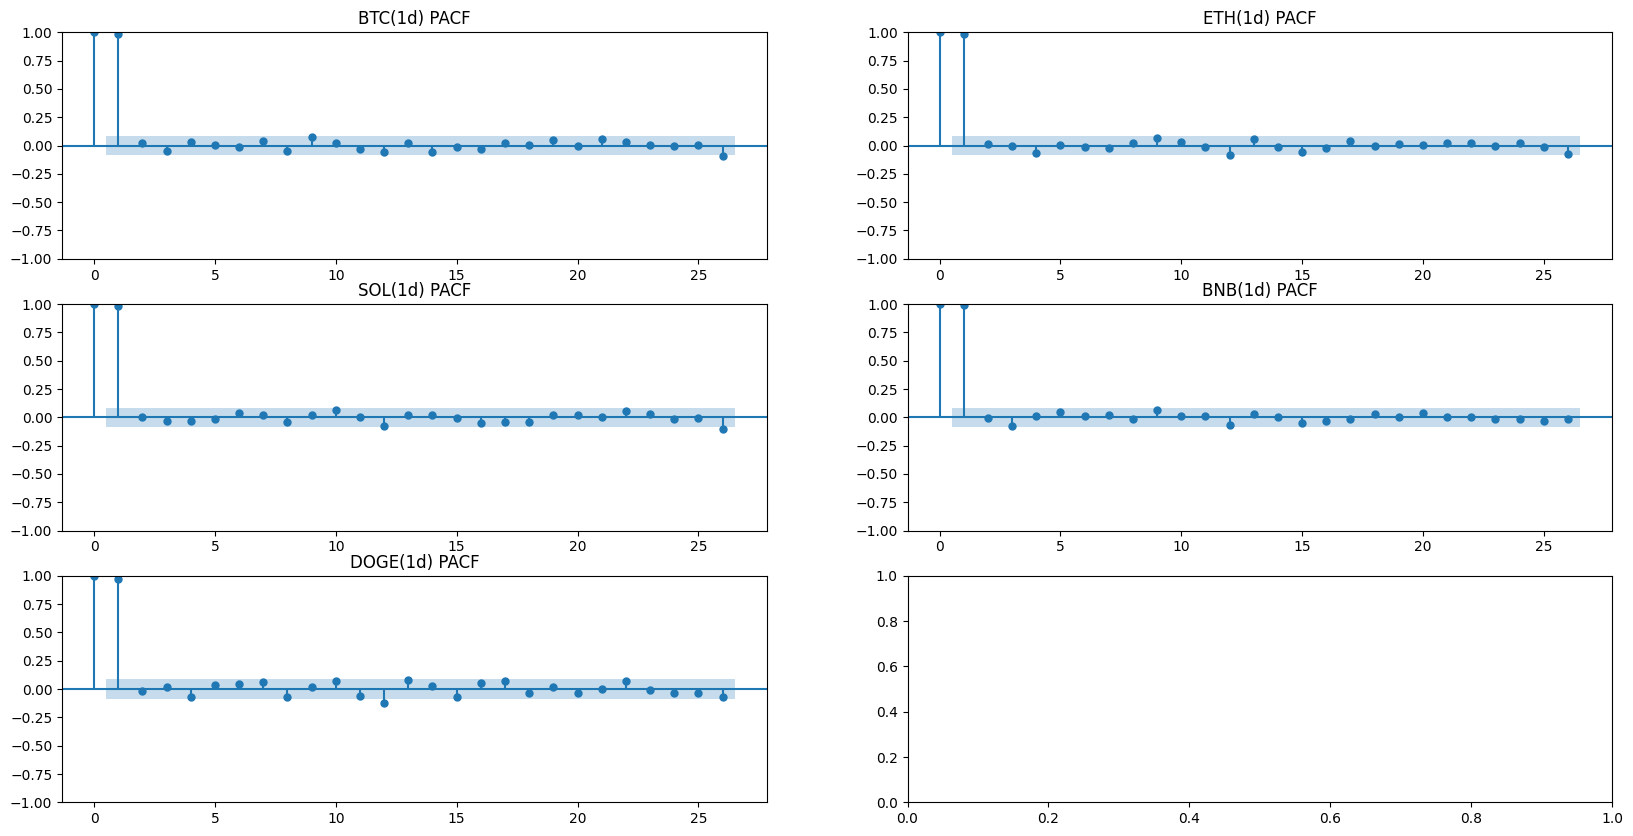

In [ ]:
alpha = 0.1

fig, axes = plt.subplots(3, 2, figsize = (20, 10))

plot_pacf(btc["1d"].Close, alpha = alpha, title = "BTC(1d) PACF", ax = axes[0, 0])
plot_pacf(eth["1d"].Close, alpha = alpha, title = "ETH(1d) PACF", ax = axes[0, 1])
plot_pacf(sol["1d"].Close, alpha = alpha, title = "SOL(1d) PACF", ax = axes[1, 0])
plot_pacf(bnb["1d"].Close, alpha = alpha, title = "BNB(1d) PACF", ax = axes[1, 1])
plot_pacf(doge["1d"].Close, alpha = alpha, title = "DOGE(1d) PACF", ax = axes[2, 0])

fig.show()

# **ACF**

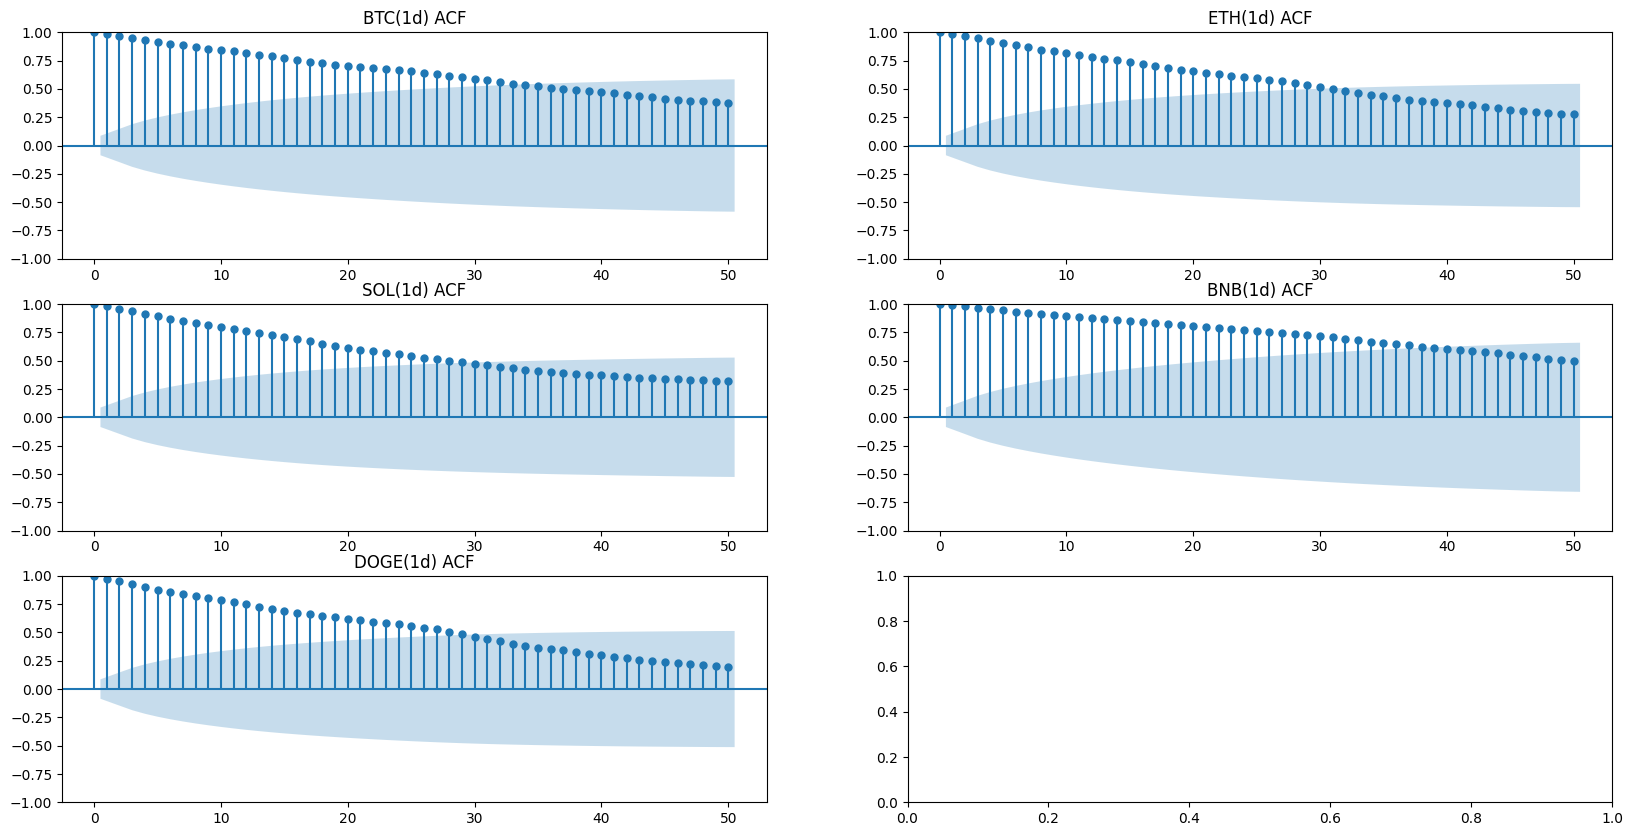

In [ ]:
alpha = 0.1

fig, axes = plt.subplots(3, 2, figsize = (20, 10))

plot_acf(btc["1d"].Close, alpha = alpha, title = "BTC(1d) ACF", ax = axes[0, 0], lags = 50)
plot_acf(eth["1d"].Close, alpha = alpha, title = "ETH(1d) ACF", ax = axes[0, 1], lags = 50)
plot_acf(sol["1d"].Close, alpha = alpha, title = "SOL(1d) ACF", ax = axes[1, 0], lags = 50)
plot_acf(bnb["1d"].Close, alpha = alpha, title = "BNB(1d) ACF", ax = axes[1, 1], lags = 50)
plot_acf(doge["1d"].Close, alpha = alpha, title = "DOGE(1d) ACF", ax = axes[2, 0], lags = 50)

fig.show()

## **The following operations are performed on BTC (1d timeframe)**

In [ ]:
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA

# **p, q values**

In [ ]:
result = arma_order_select_ic(btc["1d"].Close, ic = ["aic", "bic"], trend = "n", max_ar = 5, max_ma = 5)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [ ]:
p, q = result.aic_min_order
print(p, q)

2 0


---

# **AR**

In [ ]:
model = ARIMA(btc["1d"].Close, order = (p, 0, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  366
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -3217.451
Date:                Wed, 11 Dec 2024   AIC                           6442.902
Time:                        19:28:09   BIC                           6458.513
Sample:                    11-01-2023   HQIC                          6449.106
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.715e+04   8432.518      6.777      0.000    4.06e+04    7.37e+04
ar.L1          0.9057      0.043     20.987      0.000       0.821       0.990
ar.L2          0.0881      0.042      2.097      0.0

# **MA**

In [ ]:
q = 1

ma_model = ARIMA(btc["1d"].Close, order = (0, 0, 1))
ma_model_fit = ma_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
print(ma_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  366
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3709.430
Date:                Wed, 11 Dec 2024   AIC                           7424.860
Time:                        19:28:38   BIC                           7436.568
Sample:                    11-01-2023   HQIC                          7429.513
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.715e+04    639.482     89.367      0.000    5.59e+04    5.84e+04
ma.L1          0.9313      0.025     36.662      0.000       0.882       0.981
sigma2      3.701e+07      0.048   7.76e+08      0.0

# **ARMA**


In [ ]:
arma_model = ARIMA(btc["1d"].Close, order = (p, 0, q))
arma_model_fit = arma_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
print(arma_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  366
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -3216.947
Date:                Wed, 11 Dec 2024   AIC                           6443.894
Time:                        19:30:19   BIC                           6463.407
Sample:                    11-01-2023   HQIC                          6451.648
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.715e+04   8248.248      6.929      0.000     4.1e+04    7.33e+04
ar.L1          0.4960      0.316      1.570      0.116      -0.123       1.115
ar.L2          0.4950      0.314      1.579      0.1



---



---

 # **TRAIN**


In [ ]:
train = btc["1d"][:"2024-10-01"].Close
validation = btc["1d"]["2024-10-02":].Close


In [ ]:
model = ARIMA(train, order = (p, 0, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
predictions = model_fit.predict(start = validation.index[0], end = validation.index[-1])

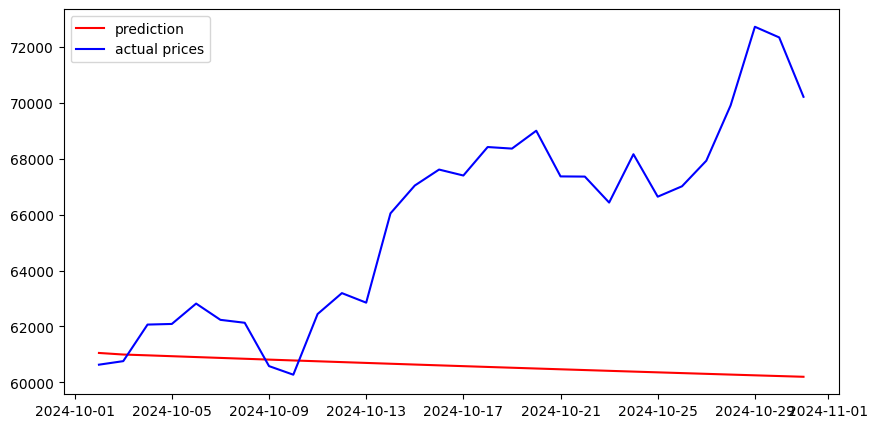

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(predictions, color = "r", label = "prediction")
plt.plot(validation, color = "b", label = "actual prices")
plt.legend()
plt.show()

In [ ]:
print(result.aic_min_order)
print(result.bic_min_order)

(2, 0)
(1, 0)


In [ ]:
p, q = result.aic_min_order
arma_model = ARIMA(btc["1d"].Close, order = (p, 0, q)).fit()

print("==============================================================================")
print(f"p value: {p}")
print(f"q value: {q}")
print(arma_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


p value: 2
q value: 0
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  366
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -3217.451
Date:                Thu, 05 Dec 2024   AIC                           6442.902
Time:                        16:51:01   BIC                           6458.513
Sample:                    11-01-2023   HQIC                          6449.106
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.715e+04   8432.518      6.777      0.000    4.06e+04    7.37e+04
ar.L1          0.9057      0.043     20.987      0.000       0.821       0.990
ar.L2          0.0881      0.0

# **AR**

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

train = btc["1d"][:"2024-10-01"].Close

ar_model = AutoReg(train, lags = 20).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  336
Model:                    AutoReg(20)   Log Likelihood               -2776.689
Method:               Conditional MLE   S.D. of innovations           1584.543
Date:                Wed, 11 Dec 2024   AIC                           5597.378
Time:                        20:06:17   BIC                           5680.004
Sample:                    11-21-2023   HQIC                          5630.386
                         - 10-01-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1092.9352    508.614      2.149      0.032      96.071    2089.800
Close.L1       0.8965      0.057     15.843      0.000       0.786       1.007
Close.L2       0.1414      0.076      1.867      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
validation = btc["1d"]["2024-10-02":].Close
ar_pred = ar_model.predict(start = validation.index[0], end = validation.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


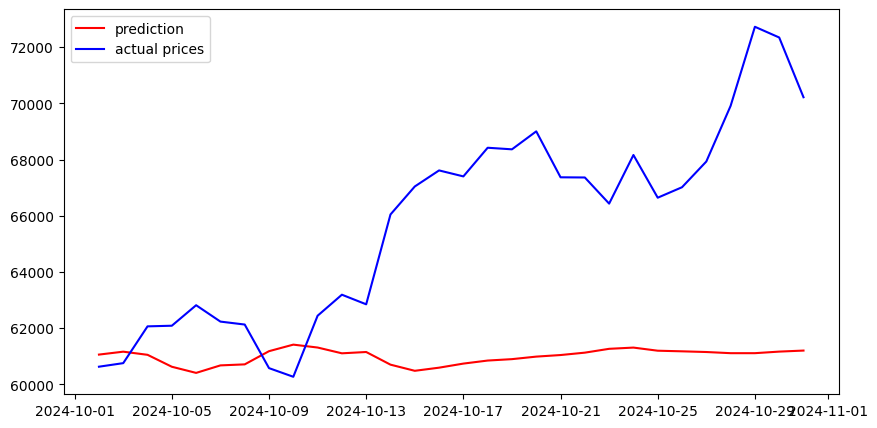

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(ar_pred, color = "r", label = "prediction")
plt.plot(validation, color = "b", label = "actual prices")
plt.legend()
plt.show()

# **MA**

In [ ]:
ma_model = ARIMA(train, order = (p, 0, q)).fit()

print(ma_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  336
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2958.340
Date:                Wed, 11 Dec 2024   AIC                           5924.680
Time:                        20:06:48   BIC                           5939.949
Sample:                    11-01-2023   HQIC                          5930.767
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.638e+04   7311.484      7.712      0.000    4.21e+04    7.07e+04
ar.L1          0.8929      0.045     19.644      0.000       0.804       0.982
ar.L2          0.0997      0.044      2.260      0.0

In [ ]:
ma_pred = ma_model.predict(start = validation.index[0], end = validation.index[-1])

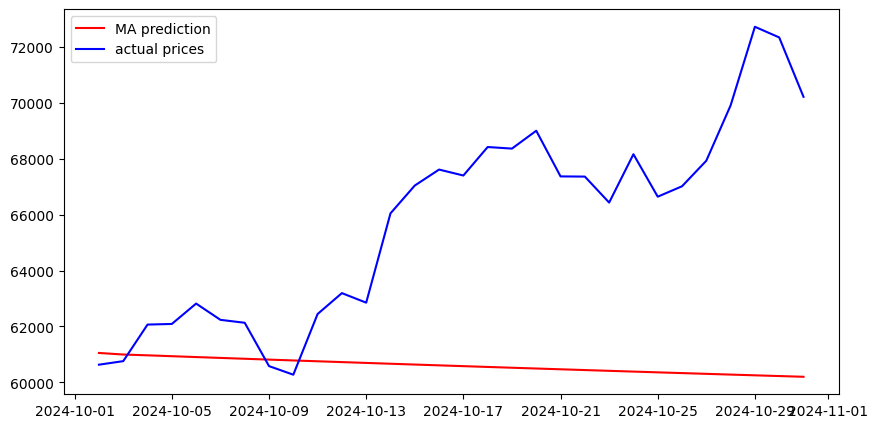

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(ma_pred, color = "r", label = "MA prediction")
plt.plot(validation, color = "b", label = "actual prices")
plt.legend()
plt.show()

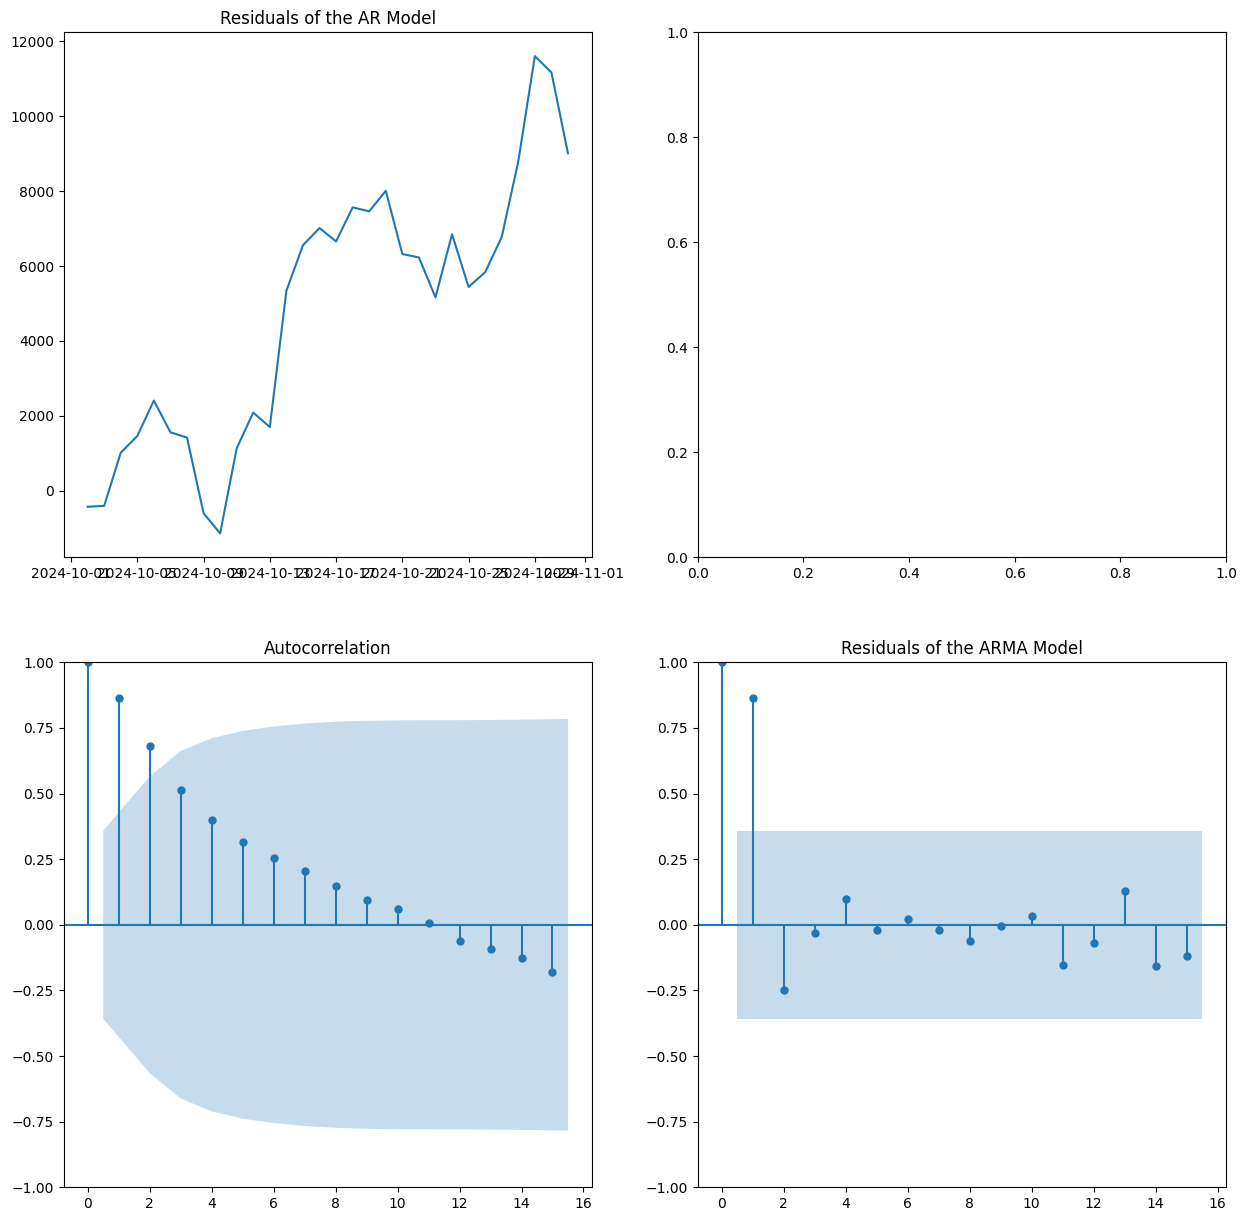

In [ ]:
residuals = validation - ar_pred

fig, axes = plt.subplots(2, 2, figsize = (15, 15))

axes[0, 0].plot(residuals)
axes[0, 0].set_title('Residuals of the AR Model')
plot_acf(residuals, lags = 15, ax = axes[1, 0])
plot_pacf(residuals, lags = 15, ax = axes[1, 1])

plt.title('Residuals of the ARMA Model')
plt.show()

In [ ]:
import numpy as np

# **MAPE**

In [ ]:
mape = np.mean(np.abs(residuals / validation) * 100)
print(f"MAPE: {mape}")

MAPE: 7.215768046632343


# **MSE**

In [ ]:
mse = np.mean(residuals ** 2)
print(f"MSE: {mse}")

MSE: 34860484.07266303


---

# **TRAIN (MA**)

In [ ]:
ma_model = ARIMA(train, order = (p, 0, q)).fit()

print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  336
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2958.340
Date:                Wed, 11 Dec 2024   AIC                           5924.680
Time:                        20:37:27   BIC                           5939.949
Sample:                    11-01-2023   HQIC                          5930.767
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.638e+04   7311.484      7.712      0.000    4.21e+04    7.07e+04
ar.L1          0.8929      0.045     19.644      0.000       0.804       0.982
ar.L2          0.0997      0.044      2.260      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
ma_pred = ma_model.predict(start = validation.index[0], end = validation.index[-1])

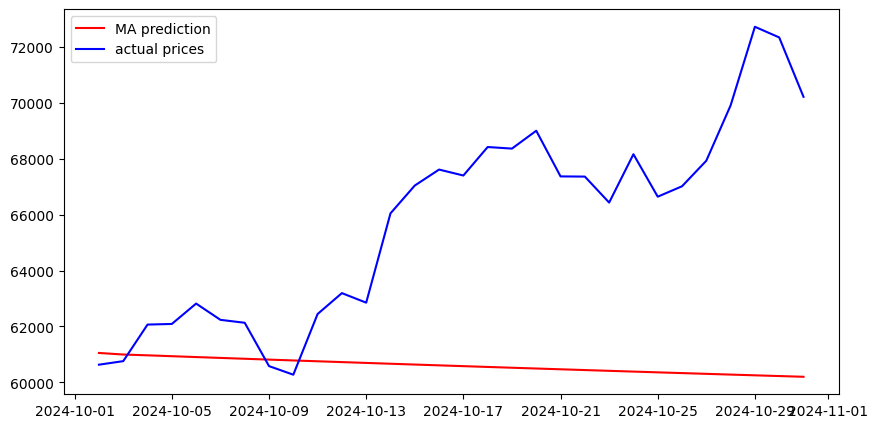

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(ma_pred, color = "r", label = "MA prediction")
plt.plot(validation, color = "b", label = "actual prices")
plt.legend()
plt.show()

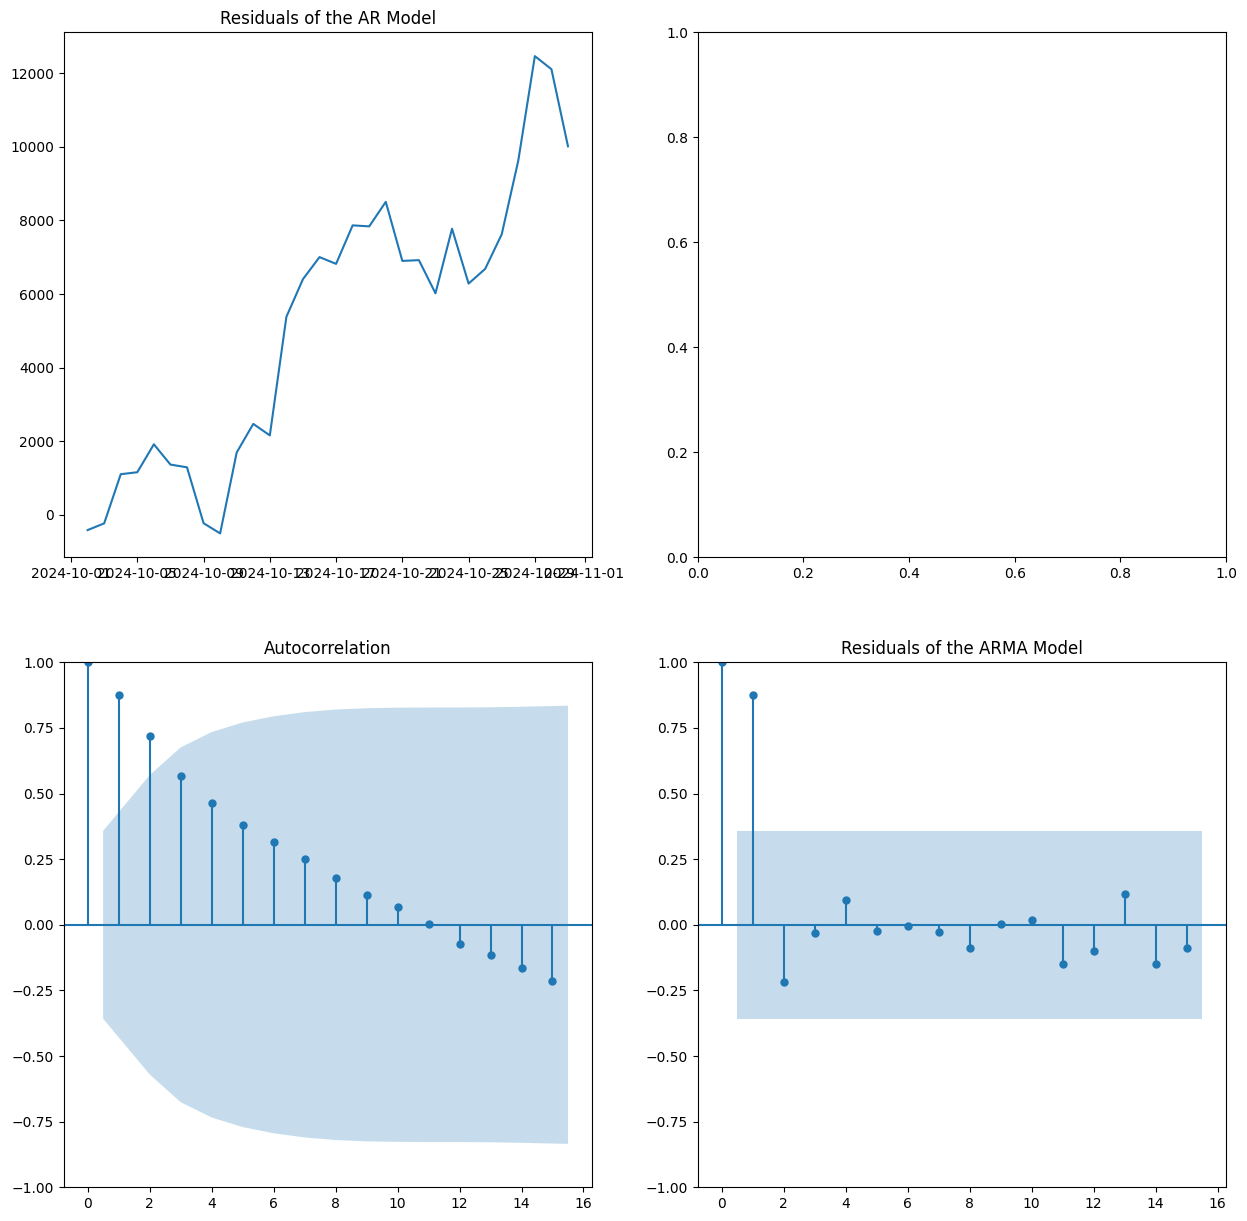

In [ ]:
residuals = validation - ma_pred

fig, axes = plt.subplots(2, 2, figsize = (15, 15))

axes[0, 0].plot(residuals)
axes[0, 0].set_title('Residuals of the AR Model')
plot_acf(residuals, lags = 15, ax = axes[1, 0])
plot_pacf(residuals, lags = 15, ax = axes[1, 1])

plt.title('Residuals of the ARMA Model')
plt.show()

# **MAPE**

In [ ]:
mape = np.mean(np.abs(residuals / validation) * 100)
print(f"MAPE: {mape}")

MAPE: 7.676463961213029


# **MSE**


In [ ]:
mse = np.mean(residuals ** 2)
print(f"MSE: {mse}")

MSE: 40491306.574315


---

# **TRAIN (ARMA)**

In [ ]:
arma_model = ARIMA(train, order = (p, 0, q)).fit()
print(arma_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  336
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2958.340
Date:                Wed, 11 Dec 2024   AIC                           5924.680
Time:                        20:38:25   BIC                           5939.949
Sample:                    11-01-2023   HQIC                          5930.767
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.638e+04   7311.484      7.712      0.000    4.21e+04    7.07e+04
ar.L1          0.8929      0.045     19.644      0.000       0.804       0.982
ar.L2          0.0997      0.044      2.260      0.0

In [ ]:
arma_pred = arma_model.predict(start = validation.index[0], end = validation.index[-1])

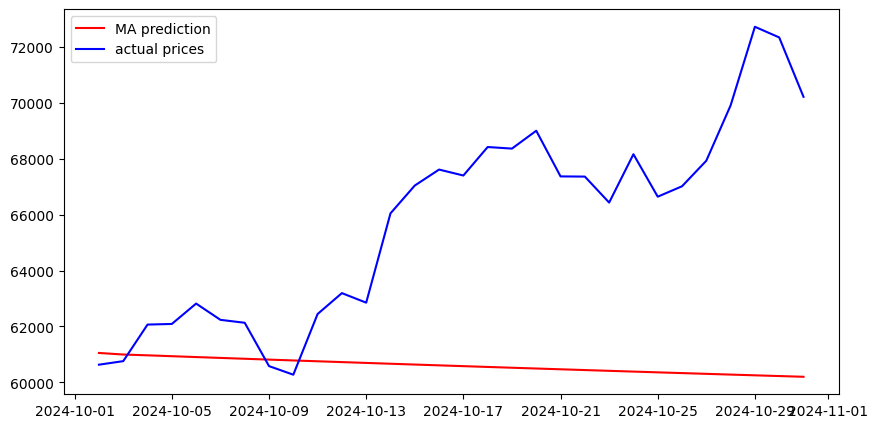

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(arma_pred, color = "r", label = "MA prediction")
plt.plot(validation, color = "b", label = "actual prices")
plt.legend()
plt.show()

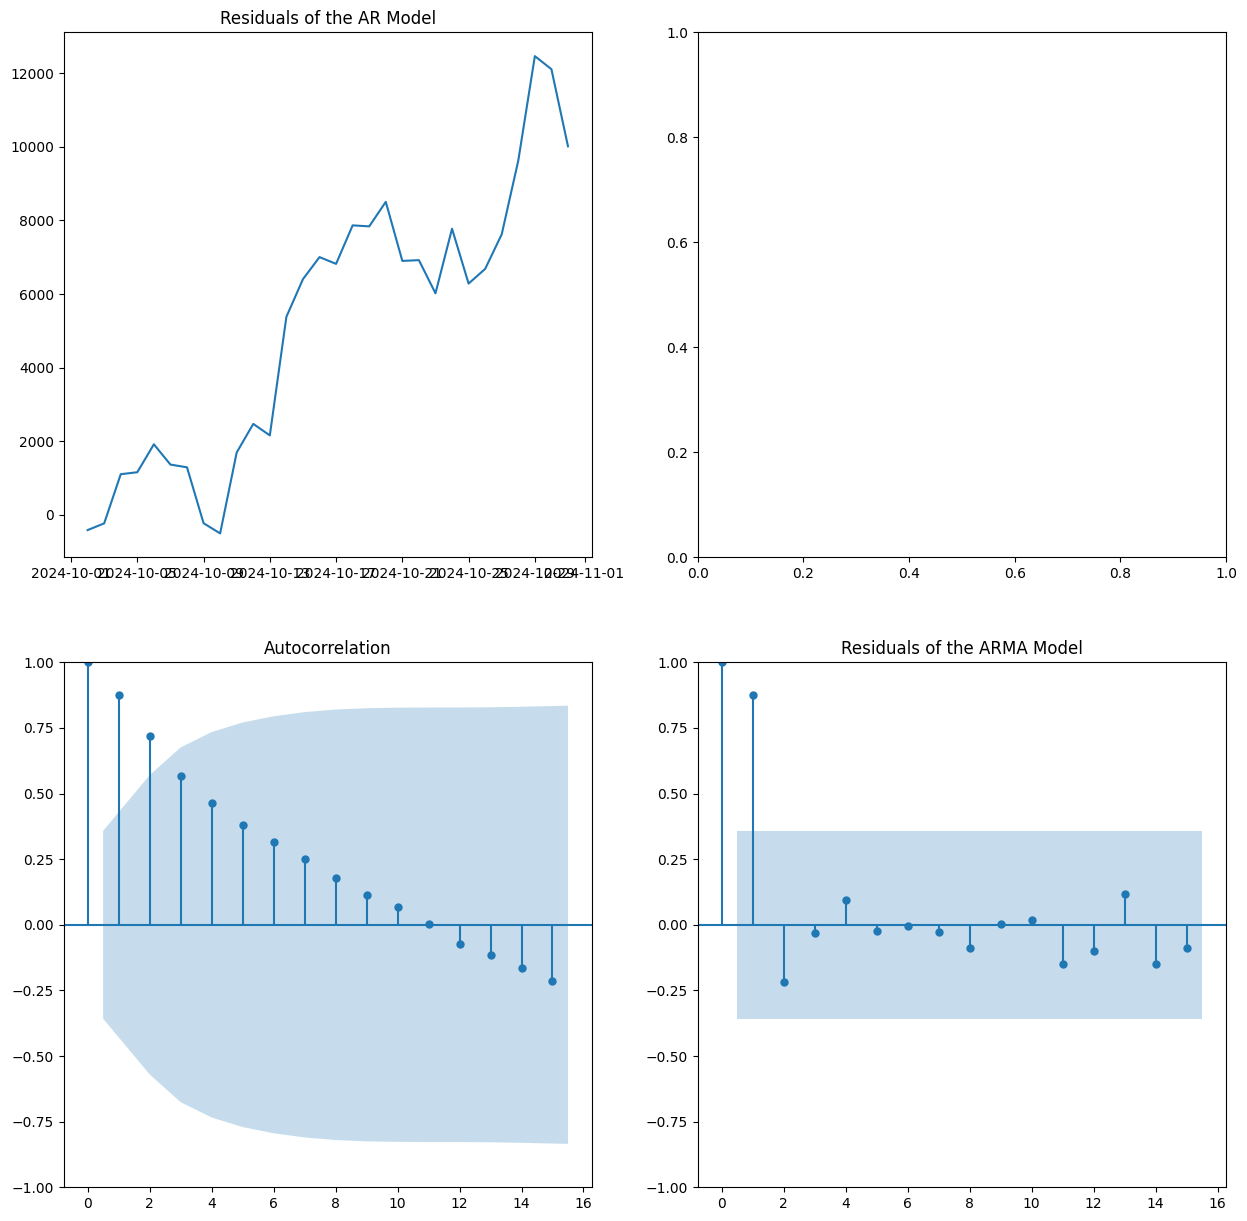

In [ ]:
residuals = validation - arma_pred

fig, axes = plt.subplots(2, 2, figsize = (15, 15))

axes[0, 0].plot(residuals)
axes[0, 0].set_title('Residuals of the AR Model')
plot_acf(residuals, lags = 15, ax = axes[1, 0])
plot_pacf(residuals, lags = 15, ax = axes[1, 1])

plt.title('Residuals of the ARMA Model')
plt.show()

# **MAPE**

In [ ]:
mape = np.mean(np.abs(residuals / validation) * 100)
print(f"MAPE: {mape}")

MAPE: 7.676463961213029


# **MSE**

In [ ]:
mse = np.mean(residuals ** 2)
print(f"MSE: {mse}")

MSE: 40491306.574315
